# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 9 submission</b></u>

### Roster Name: David Danialy
### Student ID: 011187150
### Email address: david.danialy@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from random import randint
import numpy as np
from tensorflow.keras import layers

In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
#Load the fashion dataset
(X_train_valid, Y_train_valid), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data() 

In [4]:
#Split the training data into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_valid, Y_train_valid, test_size=0.2, random_state=0, stratify=Y_train_valid)
#Flatten the data.
X_train_flattened = X_train.reshape((len(X_train), -1))
X_validation_flattened = X_validation.reshape((len(X_validation), -1))
X_test_flattened = X_test.reshape((len(X_test), -1))
Y_train.shape, X_train_flattened.shape
#https://stackoverflow.com/questions/48851558/tensorflow-estimator-valueerror-logits-and-labels-must-have-the-same-shape
#Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
#Y_train.shape, X_train_flattened.shape

((48000,), (48000, 784))

In [5]:
## input layer
input_layer = Input(shape=(784,))   # 28*28

## encoding architecture
encode_layer1 = Dense(128, activation='relu')(input_layer)
encode_layer2 = Dense(64, activation='relu')(encode_layer1)

## latent view
latent_view   = Dense(32, activation='sigmoid')(encode_layer2)

## decoding architecture
decode_layer1 = Dense(64, activation='relu')(latent_view)
decode_layer2 = Dense(128, activation='relu')(decode_layer1)

## output layer
output_layer  = Dense(784)(decode_layer2)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136

In [6]:
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_flattened, X_train_flattened,
                epochs=75,
                batch_size=2048,
                shuffle=True,
                validation_data=(X_validation_flattened, X_validation_flattened))

Epoch 1/75
24/24 [==============================] - 1s 6ms/step - loss: 13306.6709 - val_loss: 13212.9229
Epoch 2/75
24/24 [==============================] - 0s 3ms/step - loss: 12421.4492 - val_loss: 11348.5908
Epoch 3/75
24/24 [==============================] - 0s 3ms/step - loss: 9448.1133 - val_loss: 7435.7705
Epoch 4/75
24/24 [==============================] - 0s 3ms/step - loss: 6234.2095 - val_loss: 5583.7739
Epoch 5/75
24/24 [==============================] - 0s 3ms/step - loss: 5339.2837 - val_loss: 5231.6704
Epoch 6/75
24/24 [==============================] - 0s 3ms/step - loss: 5161.3911 - val_loss: 5147.5615
Epoch 7/75
24/24 [==============================] - 0s 3ms/step - loss: 5077.1611 - val_loss: 5044.9985
Epoch 8/75
24/24 [==============================] - 0s 3ms/step - loss: 4918.3535 - val_loss: 4842.6543
Epoch 9/75
24/24 [==============================] - 0s 4ms/step - loss: 4772.3179 - val_loss: 4790.2793
Epoch 10/75
24/24 [==============================] - 0s 4ms/

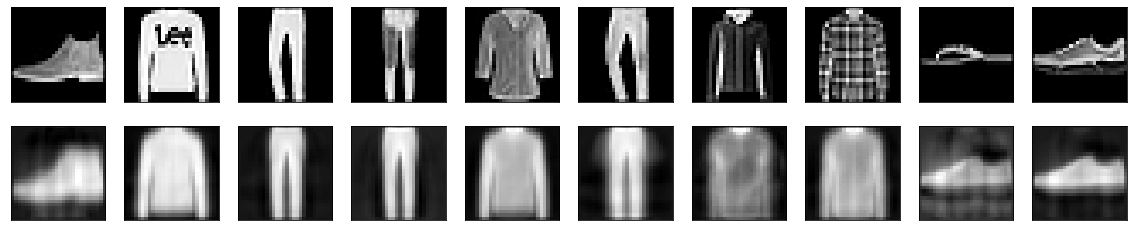

In [7]:
predictions = model.predict(X_test_flattened)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_flattened[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
noise_factor = .4
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
x_validation_noisy = X_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_validation.shape) 
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train_noisy = x_train_noisy.reshape(-1, 28, 28, 1)
x_validation_noisy = x_validation_noisy.reshape(-1, 28, 28, 1)
x_test_noisy = x_test_noisy.reshape(-1, 28, 28, 1)

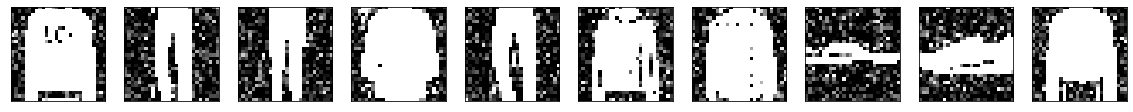

In [9]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
input_layer = Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0   

In [11]:
autoencoder.fit(x_train_noisy, X_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, X_validation))

Epoch 1/30
24/24 [==============================] - 3s 33ms/step - loss: -485.3189 - val_loss: -1103.5828
Epoch 2/30
24/24 [==============================] - 0s 18ms/step - loss: -1095.4678 - val_loss: -1103.4633
Epoch 3/30
24/24 [==============================] - 0s 19ms/step - loss: -1095.4398 - val_loss: -1103.4603
Epoch 4/30
24/24 [==============================] - 0s 18ms/step - loss: -1095.4404 - val_loss: -1103.4666
Epoch 5/30
24/24 [==============================] - 0s 19ms/step - loss: -1095.4580 - val_loss: -1103.5182
Epoch 6/30
24/24 [==============================] - 1s 21ms/step - loss: -1095.5416 - val_loss: -1103.6151
Epoch 7/30
24/24 [==============================] - 0s 19ms/step - loss: -1095.6476 - val_loss: -1103.7274
Epoch 8/30
24/24 [==============================] - 0s 19ms/step - loss: -1095.7462 - val_loss: -1103.8202
Epoch 9/30
24/24 [==============================] - 1s 21ms/step - loss: -1095.8895 - val_loss: -1104.0487
Epoch 10/30
24/24 [===================

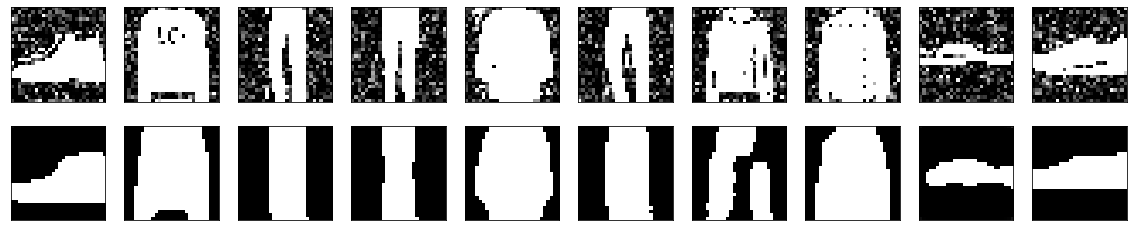

In [12]:
predictions = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()